In [1]:
import pandas as pd

df = pd.read_csv (r'~/Downloads/values.csv')

In [45]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [2]:
df.describe()

,a,b,c
count,2.930000e+02,293.000000,293.000000
mean,-3.793106e-06,0.097745,-532.208275
std,9.057253e-07,0.017059,87.844236
min,-1.191466e-05,0.062540,-1112.948629
25%,-4.243026e-06,0.086497,-582.197177
50%,-3.729551e-06,0.096546,-526.825773
75%,-3.183655e-06,0.107152,-475.494365
max,-1.884254e-06,0.237608,-363.625559


# Load Values From File

In [227]:
import glob
import numpy as np

path = r'../data_tue/*' # use your path
all_folders = glob.glob(path)


li = []
df_out=pd.DataFrame(columns=['id','real_temp','adc_value'])
df_out_id=pd.DataFrame(columns=['id','tmp_l','adc_l','tmp_m','adc_m','tmp_h','adc_h'])

# dl=pd.DataFrame(columns=['real_temp','header','frimware_adc','col4','col5','col6','col7','col8','col9','col10','col11','col12','col3','col4','col15'])
i=1
j=1
l=1
for folder in all_folders:
    df=pd.read_csv(folder+'/data.txt', index_col=None, header=None)
    np_low_temp=np.array([])
    np_low_adc=np.array([])
    np_high_temp=np.array([])
    np_high_adc=np.array([])
    np_mid_temp=np.array([])
    np_mid_adc=np.array([])
    for row in df.iterrows():
        try:
            if row[1][3]==265:
                df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][5])
            else:
                df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][6])
            if df_out.loc[i]['real_temp']<10:
                np_low_temp = np.append(np_low_temp, df_out.loc[i]['real_temp'])
                np_low_adc = np.append(np_low_adc, df_out.loc[i]['adc_value'])
            elif df_out.loc[i]['real_temp']>60:
                np_high_temp = np.append(np_high_temp, df_out.loc[i]['real_temp'])
                np_high_adc = np.append(np_high_adc, df_out.loc[i]['adc_value'])
            else:
                np_mid_temp =  np.append(np_mid_temp, df_out.loc[i]['real_temp'])
                np_mid_adc =  np.append(np_mid_adc, df_out.loc[i]['adc_value'])
            i+=1
        except:
            print (bcolors.WARNING + "Warning: There has Been an error with ID:  "+str(folder.split('/')[2])+ bcolors.ENDC)
            break
    #removing some outliers
#     if np.average(np_low_adc)<OUTLIER and np.average(np_mid_adc)<OUTLIER and np.average(np_high_adc)<OUTLIER and np.average(np_low_adc)>OUTLIER_LOW and np.average(np_mid_adc)>OUTLIER_LOW and np.average(np_high_adc)>OUTLIER_LOW:
        #probably we could double check the std, to ensure that value of the sensor is good.
    df_out_id.loc[l]= folder.split('/')[2],np.average(np_low_temp),np.average(np_low_adc),np.average(np_mid_temp),np.average(np_mid_adc),np.average(np_high_temp),np.average(np_high_adc)
    l+=1
    if j%50 == 0:
#         print (bcolors.WARNING+"Printing ID:  "+str(folder.split('/')[2])+bcolors.ENDC)
        print ("Loading file number:........."+str(j))
    j+=1
    #     df = pd.read_csv(folder+'/data.txt', index_col=None, header=0)
# frame = pd.concat(li, axis=0, ignore_index=True)

/Users/rbol384/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/rbol384/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Loading file number:.........50
Loading file number:.........100
Loading file number:.........150
Loading file number:.........200
Loading file number:.........250


In [433]:
#Clean up
df_out_id=df_out_id.dropna()
df_out=df_out.dropna()

In [449]:
OUTLIER_TOP=15000
OUTLIER_LOW=6000

df_clean=df_out_id.copy()
# df_clean = df_clean.drop(df_out_id[(df_out_id.adc_l > OUTLIER_TOP].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_l > OUTLIER_TOP )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_m > 10000 )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_h > OUTLIER_TOP )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_l < OUTLIER_LOW )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_m < OUTLIER_LOW )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_h < OUTLIER_LOW )].index)

# df_clean = df_clean.drop(df_clean[(df_clean.tmp_l > 3 )].index)
# df_clean = df_clean.drop(df_clean[(df_clean.tmp_l < 3.2 )].index)
# df_clean = df_clean.drop(df_clean[(df_clean.tmp_h > 75)].index)
# df_clean = df_clean.drop(df_clean[(df_clean.tmp_m > 36.1)].index)


# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
df_clean=df_clean.dropna()


In [450]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 1 to 299
Data columns (total 7 columns):
id       273 non-null object
tmp_l    273 non-null float64
adc_l    273 non-null float64
tmp_m    273 non-null float64
adc_m    273 non-null float64
tmp_h    273 non-null float64
adc_h    273 non-null float64
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [451]:
df_out_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 299
Data columns (total 7 columns):
id       293 non-null object
tmp_l    293 non-null float64
adc_l    293 non-null float64
tmp_m    293 non-null float64
adc_m    293 non-null float64
tmp_h    293 non-null float64
adc_h    293 non-null float64
dtypes: float64(6), object(1)
memory usage: 18.3+ KB


In [452]:
df_out_id.head(15)

,id,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h
1,BHG2WDMA8C2DVJ7C27B3DNQZGT,3.7,8360.481481,35.9,9303.074074,73.8,10733.296296
2,XKDGHFNW6DTP98KAKHFSFYGA5Z,3.6,7620.259259,36.0,8522.464286,78.2,10231.629630
3,0N60TJ7AG5RVZCNGW6PYVAH9KV,2.3,8204.888889,36.2,9152.518519,70.0,10427.777778
4,9L9505L8N1DJW8NT6ABXB4YBQT,2.3,8035.296296,36.0,8970.518519,70.9,10192.481481
5,F6BQV0XMW1B9GNXVRRWDDDJ3TR,2.0,8532.857143,35.6,9446.296296,75.0,10863.777778
6,FTW3VFXJ9HS6LMLNXPTXFKCLKW,3.9,7679.888889,35.9,8584.962963,77.6,10227.629630
8,N72591ZCG6HD346MX22D9GD61S,2.6,7890.666667,36.0,8883.111111,71.4,10181.407407
9,Y0GKPWGVW3NXW79TLSZ0BV02YV,3.8,7408.407407,36.0,8269.185185,73.3,9699.222222
10,K8LKW1RZSR90GLVRPS4V66DSAR,2.7,7505.259259,35.8,8490.555556,75.2,10118.111111
11,3RWNYT97TB2B1RG2G24S1V5PFY,3.8,8017.037037,35.9,8853.185185,73.5,10359.555556


In [453]:
df_out_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 299
Data columns (total 7 columns):
id       293 non-null object
tmp_l    293 non-null float64
adc_l    293 non-null float64
tmp_m    293 non-null float64
adc_m    293 non-null float64
tmp_h    293 non-null float64
adc_h    293 non-null float64
dtypes: float64(6), object(1)
memory usage: 18.3+ KB


In [464]:
df_clean['n_l']=0
df_clean['n_m']=df_clean['adc_m']-df_clean['adc_l']
df_clean['n_h']=df_clean['adc_h']-df_clean['adc_l']

In [465]:
df_clean.describe()

,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h,n_m,n_h,n_l
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.0
mean,2.937909,7889.153830,35.975458,8812.774183,72.842110,10224.973403,923.620353,2335.819573,0.0
std,0.708442,436.881306,0.212527,439.064967,2.100143,447.972388,59.692439,127.010867,0.0
min,1.900000,6944.518519,35.600000,7915.740741,69.800000,9259.962963,641.222222,1765.592593,0.0
25%,2.300000,7548.444444,35.800000,8484.481481,71.300000,9939.555556,887.037037,2243.333333,0.0
50%,2.700000,7859.037037,36.000000,8787.444444,72.300000,10194.777778,920.716931,2322.619048,0.0
75%,3.600000,8165.592593,36.100000,9112.481481,73.900000,10495.370370,963.948413,2416.814815,0.0
max,4.300000,9022.666667,36.700000,9914.461538,79.700000,11577.846154,1049.925926,2702.296296,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17905a0b8>,
      dtype=object)

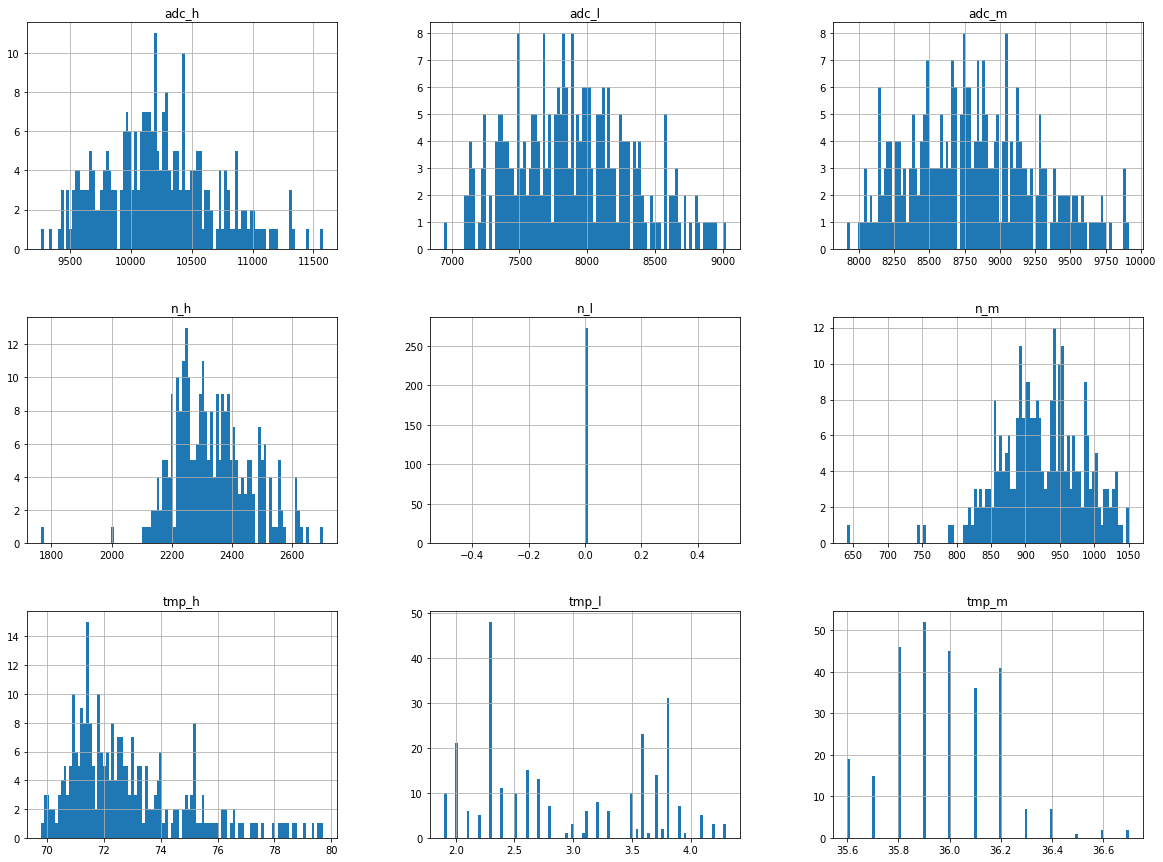

In [466]:
df_clean.hist(bins=100, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1799c8780>,
      dtype=object)

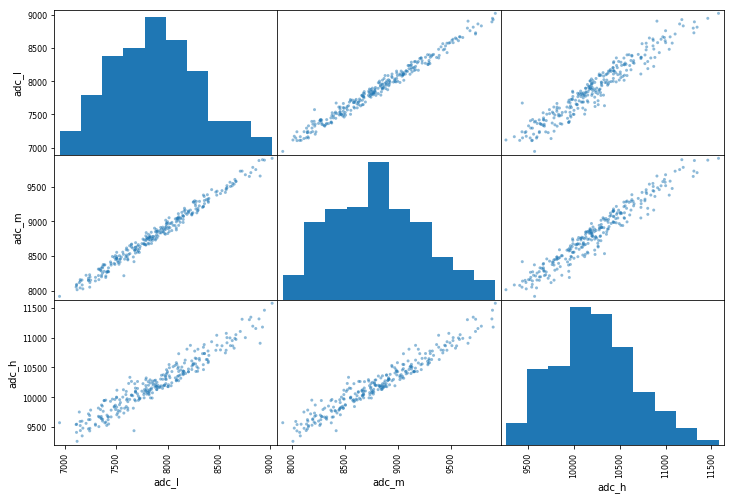

In [467]:
from pandas.plotting import scatter_matrix

attributes = ["adc_l", "adc_m", "adc_h"]
scatter_matrix(df_clean[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17ab3bac8>,
      dtype=object)

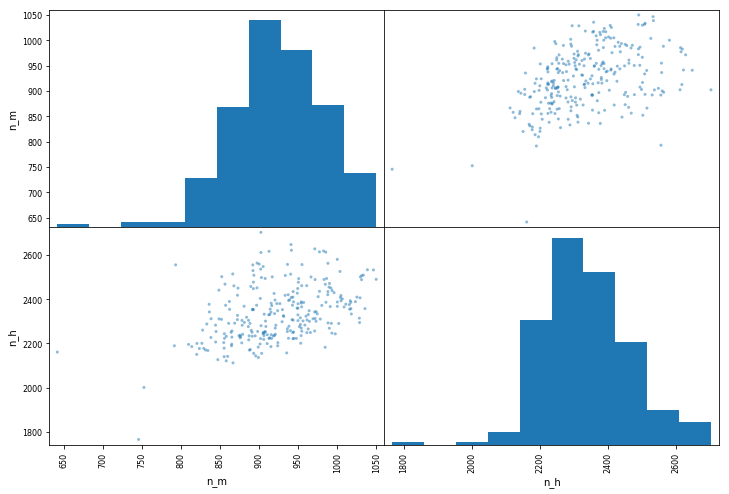

In [473]:
from pandas.plotting import scatter_matrix

attributes = ["n_m", "n_h"]
scatter_matrix(df_clean[attributes], figsize=(12, 8))

In [469]:
corr_matrix = df_clean.corr()
corr_matrix["adc_m"].sort_values(ascending=False)

adc_m    1.000000
adc_l    0.990725
adc_h    0.967103
n_m      0.104468
tmp_m    0.061702
n_h      0.003201
tmp_l   -0.059178
tmp_h   -0.089787
n_l           NaN
Name: adc_m, dtype: float64

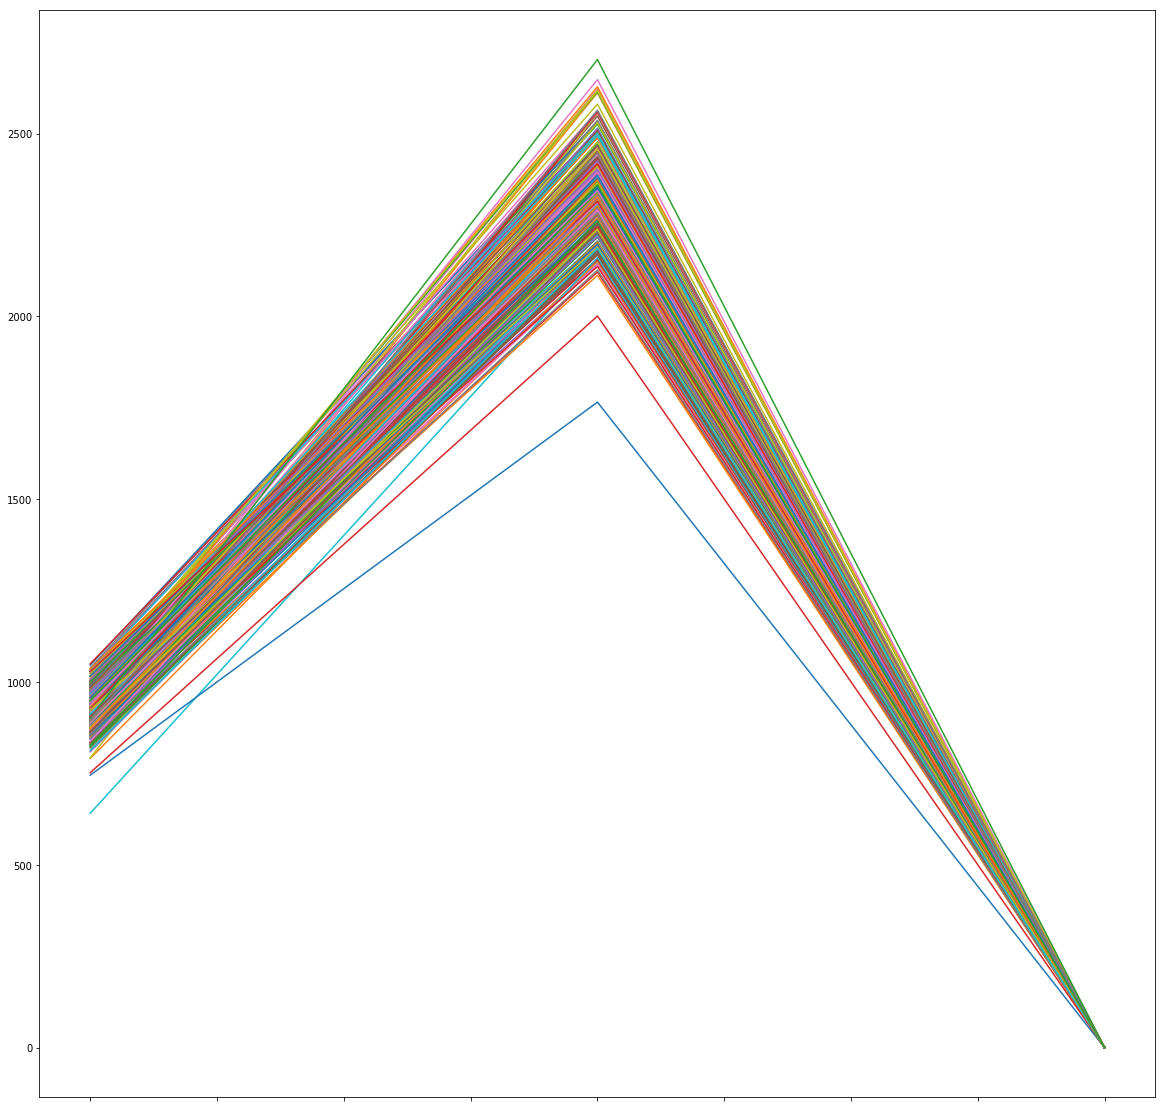

In [479]:
df=df_clean.drop(columns=['tmp_l','tmp_m','tmp_h','id'])
df=df.drop(columns=['adc_l','adc_m','adc_h'])

df.T.plot(figsize=(20, 20),legend=False)

In [480]:
df.T

,1,2,3,4,5,6,8,9,10,11,...,290,291,292,293,294,295,296,297,298,299
n_m,942.592593,902.205026,947.629630,935.222222,913.439153,905.074074,992.444444,860.777778,985.296296,836.148148,...,1028.370370,905.733516,905.962963,937.629630,892.481481,875.574074,813.555556,957.074074,872.185185,949.592593
n_h,2372.814815,2611.370370,2222.888889,2157.185185,2330.920635,2547.740741,2290.740741,2290.814815,2612.851852,2342.518519,...,2314.259259,2218.547009,2235.407407,2394.074074,2447.703704,2237.092593,2185.592593,2385.333333,2326.629630,2359.629630
n_l,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [481]:
df_clean.describe()

,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h,n_m,n_h,n_l
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.0
mean,2.937909,7889.153830,35.975458,8812.774183,72.842110,10224.973403,923.620353,2335.819573,0.0
std,0.708442,436.881306,0.212527,439.064967,2.100143,447.972388,59.692439,127.010867,0.0
min,1.900000,6944.518519,35.600000,7915.740741,69.800000,9259.962963,641.222222,1765.592593,0.0
25%,2.300000,7548.444444,35.800000,8484.481481,71.300000,9939.555556,887.037037,2243.333333,0.0
50%,2.700000,7859.037037,36.000000,8787.444444,72.300000,10194.777778,920.716931,2322.619048,0.0
75%,3.600000,8165.592593,36.100000,9112.481481,73.900000,10495.370370,963.948413,2416.814815,0.0
max,4.300000,9022.666667,36.700000,9914.461538,79.700000,11577.846154,1049.925926,2702.296296,0.0


In [448]:
from sklearn import preprocessing

# x = df_clean['adc_m'].values #returns a numpy array
min_max_scaler = preprocessing.normalize()
x_scaled = min_max_scaler.fit_transform([df_clean['adc_l'].values,df_clean['adc_m'].values,df_clean['adc_h'].values])
df_scaled = pd.DataFrame(x_scaled)

TypeError: normalize() missing 1 required positional argument: 'X'

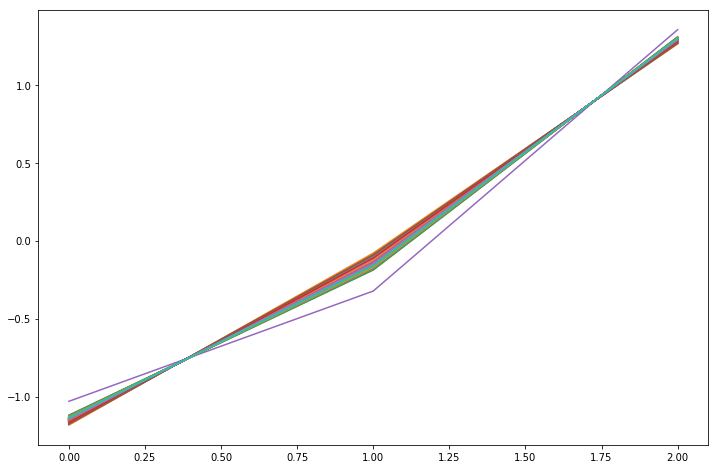

In [401]:
df_scaled.plot( figsize=(12, 8), legend=False)

In [402]:
df_scaled.T.describe()

,0,1,2
count,130.000000,130.000000,130.000000
mean,-1.148355,-0.140272,1.288627
std,0.015954,0.026299,0.010393
min,-1.182922,-0.323133,1.262670
25%,-1.156498,-0.154334,1.283149
50%,-1.148147,-0.140991,1.289139
75%,-1.140263,-0.126652,1.294597
max,-1.030779,-0.079748,1.353913


In [271]:
df_out['real_temp'].describe()

count    24692.000000
mean        36.723084
std         28.679347
min          1.900000
25%          3.600000
50%         35.900000
75%         71.300000
max         79.700000
Name: real_temp, dtype: float64

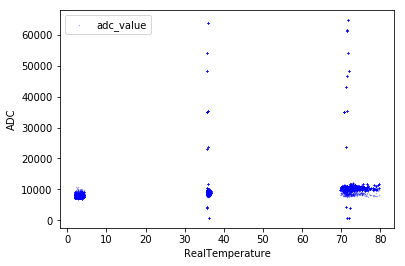

In [304]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

x = df_out['real_temp']
y = df_out['adc_value']
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s=0.1, c="b", alpha=0.5)
plt.xlabel("RealTemperature")
plt.ylabel("ADC")
plt.legend(loc='upper left')
plt.show()

In [291]:
##ML

In [ ]:
df_norm[]